# MENTORÍA: Predicción de indicadores sociales para países del MERCOSUR

# Práctico 3: Introducción a ML - Aprendizaje Supervisado

[Link a la descripción del proyecto](https://github.com/jfrau/DiploDatos2020/blob/master/README.md)

## Introducción

En este práctico se buscará trabajar el problema de series temporales multivariadas de esta mentoría desde el punto de vista de los algoritmos base de machine learning y Aprendizaje Supervisado. 

Sobre la base de que existen modelos específicamente diseñados para datos en forma de series temporales (los cuales escapan al alcance de los contenidos de la Diplomatura) y que tienen un desempeño bastante robusto, en este práctico nos centraremos no tanto en los resultados de los modelos base sino más bien implementar técnicas y estrategias usuales al momento de atacar problemas y que son bastante comunes en la vida diaria de un Científico de datos.

Estas estrategias se relacionan con:

- Construcción de features.
- Codificación de variables categóricas.
- Redefinición de un problema.
- Implementación y seguimiento de diferentes modelos.
- Análisis de resultados en base a los algoritmos utilizados y la cantidad de datos disponibles.


## Metodología de trabajo

En este práctico se disponibilizan datos de **BRASIL, URUGUAY y PARAGUAY** para algunos indicadores y algunos features en la franja temporal 1990-2018. Los mismos ya fueron curados, con lo cual no contienen ningún dato faltante o no nulo. Este proceso de curación se llevó a cabo teniendo en cuenta features compartidos con ARGENTINA (de la lista resultante del práctico anterior), de manera tal de poder realizar una suerte de "unión" entre los datos.

## Propuesta

Intentar explicar la variable **Índice de Gini** perteneciente al Indicador Pobreza (planteada como una columna target) utilizando las siguientes variables:

- **Brecha de pobreza a 1,90 por día (2011 PPA)**	(Indicador Pobreza)
- **Tasa de incidencia de la pobreza, sobre la base de 1,90 por día (2011 PPA) (% de la población)** (Indicador Pobreza) : porcentaje de la población que vive con menos de 1,90 dólares al día a precios internacionales de 2011.
- **Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)** (Indicador Protección Social)
- **Población activa, total** (Indicador Educación)
- **País** (Argentina, Brasil, Uruguay y Paraguay)
- **Año** (Franja temporal 1990-2018)


La propuesta se realiza en base a la posible relación o influencia de las variables de la lista anterior con el Índice de Gini (que intenta representar la inequidad social). Es importante mencionar que dicha elección tiene en cuenta además lo acotado de las bases de datos luego del proceso de curación. 

Sin embargo, dentro de los datasets que se disponibilizan existen otras variables que podrían eventualmente reemplazar a alguna de la lista o incluso a la variable target (siempre que exista una lógica en ello). *Esta es la razón por la que se plantea esta propuesta inicial, la cual puede ser modificada de acuerdo a posibles evaluaciones o decisiones del grupo.*

## Consideración importante

Como se observará más abajo el dataset que se construye contiene 28x4 (112) filas (28 años en  países sobre 4 países ) y un total de 9 columnas (sin contar la columna target) que desde el punto de vista de modelos de machine learning (sobretodo los más complejos) es considerada poca data.  Aconsejo revisar estos atículos sobre los grados de libertad en modelos de machine learning: [post1](https://machinelearningmastery.com/degrees-of-freedom-in-machine-learning/#:~:text=In%20machine%20learning%2C%20the%20degrees,a%20deep%20learning%20neural%20network.&text=In%20statistics%2C%20degrees%20of%20freedom,used%20to%20calculate%20a%20statistic.), [post2](https://discuss.analyticsvidhya.com/t/significance-of-degree-of-freedom/9127) para profundizar este tema. Esto significa que **agregar más variables y mantener solo 4 países NO es una opción**, a menos que sume otro país.

## Parte I: Preprocesamiento de los datos

In [1]:
import pandas as pd
import io
import numpy as np
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
#Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


**EL CODIGO QUE SIGUE ES PARA CARGAR LOS EXCEL QUE SE USAN A LA NOTEBOOK. CUANDO LO CORREN, PIDE VOLVER A CARGAR LOS ARCHIVOS. LOS QUE HAY QUE CARGAR ESTÁN EN LA CARPETA DE DRIVE**

In [2]:
#from google.colab import files
#uploaded = files.upload()

Saving educacion_BRA_1990_2018.csv to educacion_BRA_1990_2018.csv
Saving educacion_mercosur_cleaned.csv to educacion_mercosur_cleaned.csv
Saving educacion_PAR_1990_2018.csv to educacion_PAR_1990_2018.csv
Saving educacion_URU_1990_2018.csv to educacion_URU_1990_2018.csv
Saving FinalEducation to FinalEducation
Saving FinalEducation.csv to FinalEducation.csv
Saving FinalGender to FinalGender
Saving FinalGender.csv to FinalGender.csv
Saving FinalPoverty to FinalPoverty
Saving FinalPoverty.csv to FinalPoverty.csv
Saving FinalSocialProtection to FinalSocialProtection
Saving FinalSocialProtection.csv to FinalSocialProtection.csv
Saving pobreza_BRA_1990_2018.csv to pobreza_BRA_1990_2018.csv
Saving pobreza_PAR_1990_2018.csv to pobreza_PAR_1990_2018.csv
Saving pobreza_URU_1990_2018.csv to pobreza_URU_1990_2018.csv
Saving proteccionsocial_BRA_1990_2018.csv to proteccionsocial_BRA_1990_2018.csv
Saving proteccionsocial_PAR_1990_2018.csv to proteccionsocial_PAR_1990_2018.csv
Saving proteccionsocial_

### Carga de datos

In [3]:

pobreza_BRA_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/pobreza_BRA_1990_2018.csv")
columns = pobreza_BRA_1990_2018.columns
pobreza_BRA_1990_2018 = pobreza_BRA_1990_2018.rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)
pobreza_URU_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/pobreza_URU_1990_2018.csv").rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)
pobreza_PAR_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/pobreza_PAR_1990_2018.csv").rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)

In [4]:
# Datasets protección social
proteccionsocial_BRA_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/proteccionsocial_BRA_1990_2018.csv")
columns = proteccionsocial_BRA_1990_2018.columns
proteccionsocial_BRA_1990_2018 = proteccionsocial_BRA_1990_2018.rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)
proteccionsocial_URU_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/proteccionsocial_URU_1990_2018.csv").rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)
proteccionsocial_PAR_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/proteccionsocial_PAR_1990_2018.csv").rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)


In [5]:
# Datasets educación
educacion_BRA_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/educacion_BRA_1990_2018.csv")
columns = educacion_BRA_1990_2018.columns
educacion_BRA_1990_2018 = educacion_BRA_1990_2018.rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)
educacion_URU_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/educacion_URU_1990_2018.csv").rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)
educacion_PAR_1990_2018 = pd.read_csv("https://raw.githubusercontent.com/sanmope/MentoriaMercosur/master/Entregables/Archivos/educacion_PAR_1990_2018.csv").rename(columns = lambda x : str(x)[:4] if x in columns[4:] else x)


### Filtro por indicadores

#### Pobreza

In [6]:
codigos_indicadores_pobreza = ['SI.POV.GINI','SI.POV.GAPS','SI.POV.DDAY']

In [7]:
pobreza_BRA = pobreza_BRA_1990_2018[pobreza_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]
pobreza_URU = pobreza_URU_1990_2018[pobreza_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]
pobreza_PAR = pobreza_PAR_1990_2018[pobreza_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]

In [8]:
pobreza_PAR['Indicator Name'].unique()

array(['Índice de Gini',
       'Brecha de pobreza a $1,90 por día (2011 PPA) (%)',
       'Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)'],
      dtype=object)

#### Protección Social

In [9]:
codigos_indicadores_proteccionsocial = ['SL.UEM.TOTL.NE.ZS']

In [10]:
proteccionsocial_BRA = proteccionsocial_BRA_1990_2018[proteccionsocial_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]
proteccionsocial_URU = proteccionsocial_URU_1990_2018[proteccionsocial_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]
proteccionsocial_PAR = proteccionsocial_PAR_1990_2018[proteccionsocial_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]

In [11]:
proteccionsocial_BRA['Indicator Name'].unique()

array(['Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)'],
      dtype=object)

#### Educación

In [12]:
codigos_indicadores_educacion = ['SL.TLF.TOTL.IN']

In [13]:
educacion_BRA = educacion_BRA_1990_2018[educacion_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]
educacion_URU = educacion_URU_1990_2018[educacion_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]
educacion_PAR = educacion_PAR_1990_2018[educacion_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]

In [14]:
educacion_BRA['Indicator Name'].unique()

array(['Población activa, total'], dtype=object)

### Construcción del dataset para modelos de supervisado

Primero generamos una lista con los features escogidos de cada indicador para luego formar el dataset por país con los features seleccionados de cada indicador por separado. En segundo lugar se concatenan los diferentes datasets por países para un mismo indicador. En tercer lugar, finalmente, se concatenan los diferentes datasets de los diferentes indicadores que ya contienen todos los países y los features seleccionados.

In [15]:
variables_educacion = codigos_indicadores_educacion
variables_proteccionsocial = codigos_indicadores_proteccionsocial
variables_pobreza = codigos_indicadores_pobreza

In [16]:
def generacion_dataset(dataset,lista_indicadores,pais_string):

    dataset = dataset[dataset['Indicator Code'].isin(lista_indicadores)]
    df = dataset.drop(['Country Name', 'Country Code', 'Indicator Code'],axis=1)
    df = df.columns.to_frame().T.append(df, ignore_index=True)
    df.columns = range(len(df.columns))
    df1 = df.T
    df1.columns = df1.iloc[0]
    df1 = df1.drop(df1.index[0])
    df1['Country'] = pais_string
    return df1

#### Variables tomadas de Educación

Generamos el dataset con los features seleccionados de educación.

In [17]:
df_educacion_PAR = generacion_dataset(educacion_PAR,variables_educacion,'PAR')
df_educacion_BRA = generacion_dataset(educacion_BRA,variables_educacion,'BRA')
df_educacion_URU = generacion_dataset(educacion_URU,variables_educacion,'URU')

In [18]:
educacion = pd.concat([df_educacion_PAR, df_educacion_BRA,df_educacion_URU]).rename(columns={"Indicator Name": "Year"})
educacion

,Year,"Población activa, total",Country
1,1990,1.7066e+06,PAR
2,1991,1.75702e+06,PAR
3,1992,1.80544e+06,PAR
4,1993,1.86062e+06,PAR
5,1994,1.9188e+06,PAR
...,...,...,...
25,2014,1.75016e+06,URU
26,2015,1.74923e+06,URU
27,2016,1.75087e+06,URU
28,2017,1.74827e+06,URU


Corroboramos que no existe ningún valor faltante:

In [19]:
educacion.isna().sum()

0
Year                       0
Población activa, total    0
Country                    0
dtype: int64

#### Variables tomadas de Protección Social

Generamos el dataset con los features seleccionados de protección social.

In [20]:
df_psocial_PAR = generacion_dataset(proteccionsocial_PAR,variables_proteccionsocial,'PAR')
df_psocial_BRA = generacion_dataset(proteccionsocial_BRA,variables_proteccionsocial,'BRA')
df_psocial_URU = generacion_dataset(proteccionsocial_URU,variables_proteccionsocial,'URU')

In [21]:
psocial = pd.concat([df_psocial_PAR, df_psocial_BRA,df_psocial_URU]).rename(columns={"Indicator Name": "Year"})
psocial

,Year,"Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country
1,1990,5.8,PAR
2,1991,5.1,PAR
3,1992,4.98,PAR
4,1993,5.06,PAR
5,1994,4.41,PAR
...,...,...,...
25,2014,6.5474,URU
26,2015,7.4879,URU
27,2016,7.8406,URU
28,2017,7.8896,URU


Corroboramos que no existe ningún valor faltante:

In [22]:
psocial.isna().sum()

0
Year                                                                                      0
Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)    0
Country                                                                                   0
dtype: int64

#### Variables tomadas de Pobreza

Generamos el dataset con los features seleccionados de protección social.

In [23]:
pobreza_PAR = generacion_dataset(pobreza_PAR,variables_pobreza,'PAR')
pobreza_BRA = generacion_dataset(pobreza_BRA,variables_pobreza,'BRA')
pobreza_URU = generacion_dataset(pobreza_URU,variables_pobreza,'URU')

In [24]:
pobreza = pd.concat([pobreza_PAR,pobreza_BRA,pobreza_URU]).rename(columns={"Indicator Name": "Year"})
pobreza

,Year,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)",Country
1,1990,40.8,0.3,1.2,PAR
2,1991,44.28,1.3,3.44,PAR
3,1992,47.76,2.3,5.68,PAR
4,1993,51.24,3.3,7.92,PAR
5,1994,54.72,4.3,10.16,PAR
...,...,...,...,...,...
25,2014,40.1,0,0.1,URU
26,2015,40.1,0,0.1,URU
27,2016,39.7,0,0.1,URU
28,2017,39.5,0,0.1,URU


Corroboramos que no existe ningún valor faltante:

In [25]:
pobreza.isna().sum()

0
Year                                                                                               0
Índice de Gini                                                                                     0
Brecha de pobreza a $1,90 por día (2011 PPA) (%)                                                   0
Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)    0
Country                                                                                            0
dtype: int64

### Conformación dataset con todos los features

In [26]:
dfmer1 = pd.merge(educacion, pobreza, on=["Country",'Year'])
df_final = dfmer1.merge(psocial,on=["Country",'Year'])
df_final

,Year,"Población activa, total",Country,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)"
0,1990,1.7066e+06,PAR,40.8,0.3,1.2,5.8
1,1991,1.75702e+06,PAR,44.28,1.3,3.44,5.1
2,1992,1.80544e+06,PAR,47.76,2.3,5.68,4.98
3,1993,1.86062e+06,PAR,51.24,3.3,7.92,5.06
4,1994,1.9188e+06,PAR,54.72,4.3,10.16,4.41
...,...,...,...,...,...,...,...
82,2014,1.75016e+06,URU,40.1,0,0.1,6.5474
83,2015,1.74923e+06,URU,40.1,0,0.1,7.4879
84,2016,1.75087e+06,URU,39.7,0,0.1,7.8406
85,2017,1.74827e+06,URU,39.5,0,0.1,7.8896


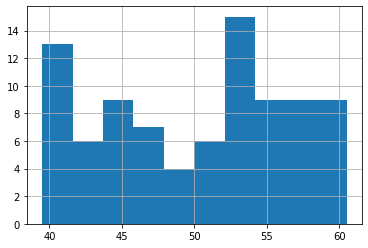

In [27]:
#Distribución índice de Gini
df_final['Índice de Gini'].hist()

## Parte II: Preparación de los datos

### Construcción de Dataset incorporando info. de Argentina



Consigna 1: Agregar la información de ARGENTINA al dataset anterior en base a lo obtenido en el Práctico de Análisis y Curación.

Cargamos los dataset de pobreza y protección social obtenidos en el práctico anterior luego del proceso de curación. En el caso de educación, el dataset del práctico de curación no contenía el feature "Población Activa, total", por lo que lo generamos el dataset correspondiente a continuación.

In [28]:
# Dataset pobreza
pobreza_ARG_1990_2018 = pd.read_csv(io.BytesIO(uploaded["FinalPoverty"])).rename(columns={"Features": "Indicator Name"}).drop(columns="Unnamed: 0")

# Dataset protección social
proteccionsocial_ARG_1990_2018 = pd.read_csv(io.BytesIO(uploaded["FinalSocialProtection"])).rename(columns={"Features": "Indicator Name"}).drop(columns="Unnamed: 0")

# Dataset educación
education = pd.read_csv(io.BytesIO(uploaded['educacion_mercosur_cleaned.csv'])).rename(columns={"Unnamed: 0": "Features"})
columns = education.columns
columnsDelete = columns[5:25].to_list()
columnsDelete = columnsDelete + [columns[-1]]
RelevantYearsEducation = education.drop(columnsDelete, axis=1).rename(columns = lambda x : str(x)[:4] if x in columns[5:] else x)
RelevantYearsEducationArg = RelevantYearsEducation[RelevantYearsEducation["Country Name"]=="Argentina"]
educacion_ARG_1990_2018 = RelevantYearsEducationArg[RelevantYearsEducationArg["Features"]=="Población activa, total"].rename(columns={"Features": "Indicator Name"})

In [29]:
pobreza_ARG = pobreza_ARG_1990_2018[pobreza_ARG_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]
proteccionsocial_ARG = proteccionsocial_ARG_1990_2018[proteccionsocial_ARG_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]
educacion_ARG = educacion_ARG_1990_2018[educacion_ARG_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]

In [30]:
df_pobreza_ARG = generacion_dataset(pobreza_ARG,variables_pobreza,'ARG')
df_psocial_ARG = generacion_dataset(proteccionsocial_ARG,variables_proteccionsocial,'ARG')
df_educacion_ARG = generacion_dataset(educacion_ARG,variables_educacion,'ARG')

Generamos el dataset con todos los features relevantes para Argentina:

In [31]:
dfArgStep1 = pd.merge(df_educacion_ARG, df_pobreza_ARG, on=["Country",'Indicator Name'])
dfArgStep2 = pd.merge(dfArgStep1, df_psocial_ARG, on=["Country",'Indicator Name'])
dfArgStep3 = dfArgStep2.rename(columns={"Indicator Name": "Year"}).drop([0])
dfArgStep3

,Year,"Población activa, total",Country,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)"
1,1990,1.35808e+07,ARG,46.8,0.7,1.1,7.06
2,1991,1.38581e+07,ARG,46.8,0.7,1.1,5.44
3,1992,1.41494e+07,ARG,45.5,1.2,2.1,6.36
4,1993,1.44668e+07,ARG,44.9,1.2,2.4,10.1
5,1994,1.47608e+07,ARG,45.9,1.5,2.3,11.76
6,1995,1.49319e+07,ARG,48.9,2.4,4.1,18.8
7,1996,1.5233e+07,ARG,49.5,2.9,4.6,17.11
8,1997,1.55835e+07,ARG,49.1,2.4,4.1,14.82
9,1998,1.58836e+07,ARG,50.7,2.3,4.6,12.65
10,1999,1.60826e+07,ARG,49.8,2.5,4.8,14.05


Unimos el dataset de Argentina con el dataset previo para el resto de los países, generando el dataset base a utilizar:

In [32]:
FinalDatasetStep1 = pd.concat([df_final, dfArgStep3])
FinalDatasetStep1

,Year,"Población activa, total",Country,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)"
0,1990,1.7066e+06,PAR,40.8,0.3,1.2,5.8
1,1991,1.75702e+06,PAR,44.28,1.3,3.44,5.1
2,1992,1.80544e+06,PAR,47.76,2.3,5.68,4.98
3,1993,1.86062e+06,PAR,51.24,3.3,7.92,5.06
4,1994,1.9188e+06,PAR,54.72,4.3,10.16,4.41
...,...,...,...,...,...,...,...
25,2014,1.90093e+07,ARG,41.7,0.3,0.7,7.2676
26,2015,1.93605e+07,ARG,41.85,0.3,0.7,7.62753
27,2016,1.96965e+07,ARG,42,0.3,0.7,7.98747
28,2017,2.00353e+07,ARG,41.2,0.2,0.5,8.3474


In [33]:
#Se convierte en variables númericas, las columnas correspondientes:
cols_to_num = FinalDatasetStep1.columns.tolist()
cols_to_num.remove("Year")
cols_to_num.remove("Country")
FinalDatasetStep1[cols_to_num] = FinalDatasetStep1[cols_to_num].apply(pd.to_numeric, errors='coerce', axis=1)

Se calcula la correlación entre las variables númericas para ver si existe correlación lineal entre ellas.

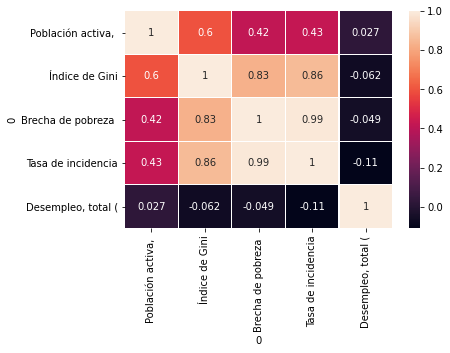

In [34]:
# calculate the correlation matrix
corr = FinalDatasetStep1.corr(method ='pearson').rename(columns = lambda x : str(x)[:18])
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cbar=True, linewidths=0.1, annot=True)

Como puede observarse, el índice de Gini (la variable target) una relación lineal positiva con la población activa, con la brecha de pobreza y con la tasa de incidencia. Mientras que, la relación entre el desempleo total y el índice de Gini, no evidencia una relación lineal clara.

Se realizam gráficos de dispersión agrupado por país para visualizar las relaciones existentes:

<Figure size 2880x1440 with 0 Axes>

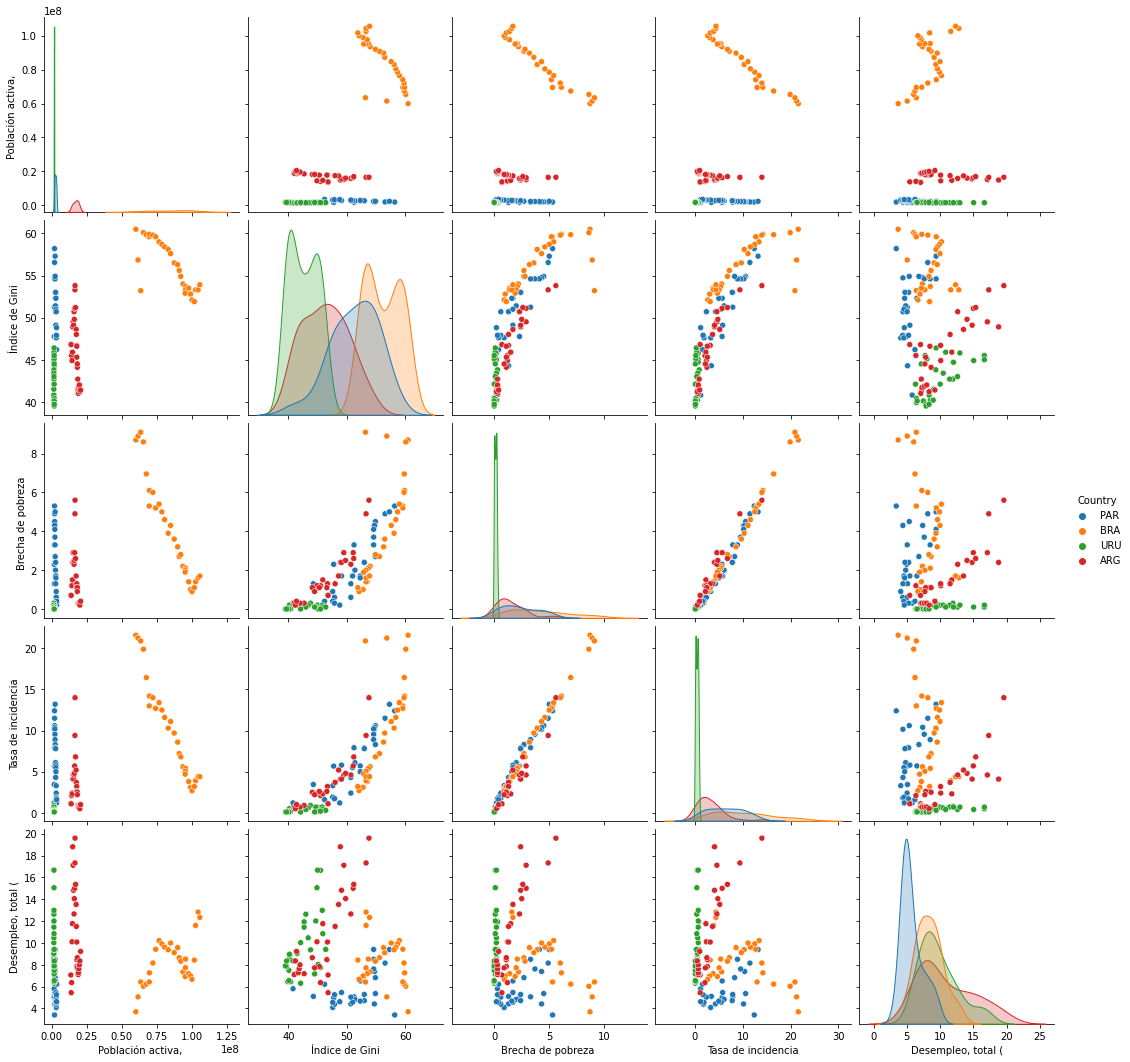

In [35]:
cols_to_num_country = cols_to_num + ["Country"]
df = FinalDatasetStep1[cols_to_num_country].rename(columns = lambda x : str(x)[:18])
cols_values = df.columns.tolist()
cols_values.remove("Country")
plt.figure(figsize=(40, 20))
sns.pairplot(data=df,
    vars=df[cols_values],hue = "Country", height=3)
plt.show()

Si se realiza un análisis de los gráficos de dispersión por país, en este caso, se reafirma que existe una relación lineal positiva entre el índice de gini y la brecha de pobreza en Brasil, Argentina y Paraguay, así como también, entre el índice de gini y la tasa de incidencia. Sin embargo, graficamente se observa que, para Uruguay, la relación entre dichas variables no es tan clara. Mientras que, la relación entre el índice de Gini y la población total activa, no es muy clara tampoco. A pesar de que la matriz de correlación muestra una relación lineal positiva, graficamente se puede observar que para BRASIL, se evidencia una relacion negativa, mientras que para el resto de los países no se puede definir una relación.

Vale destacar que el Índice de Gini muestra diferentes distribuciones según el país.

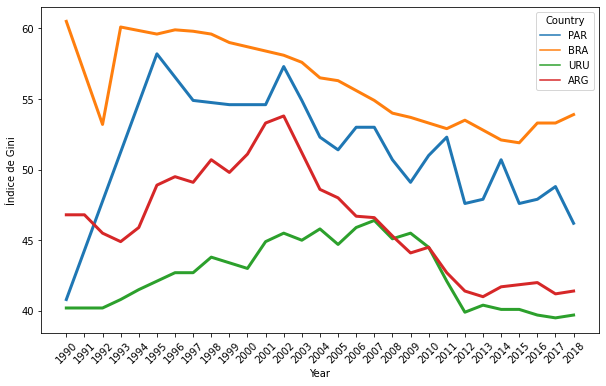

In [36]:
df = FinalDatasetStep1.copy()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df["Year"], y = df["Índice de Gini"],linewidth=3,  hue = "Country")
plt.xticks( rotation=45)
plt.show()

### Codificación/Cambios en variables


Consigna 2: convertir la columna Country en una variable dummy y codificar la columna Year

(Los siguientes links pueden ser útiles: [Link1](https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/), [Link2](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159), [Link3](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)). 

Primero convertimos la columna country en dummy:

In [37]:
FinalDatasetStep2 = pd.get_dummies(FinalDatasetStep1, columns = ["Country"])
FinalDatasetStep2

,Year,"Población activa, total",Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country_ARG,Country_BRA,Country_PAR,Country_URU
0,1990,1706598.0,40.80,0.3,1.20,5.800000,0,0,1,0
1,1991,1757024.0,44.28,1.3,3.44,5.100000,0,0,1,0
2,1992,1805441.0,47.76,2.3,5.68,4.980000,0,0,1,0
3,1993,1860615.0,51.24,3.3,7.92,5.060000,0,0,1,0
4,1994,1918799.0,54.72,4.3,10.16,4.410000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
25,2014,19009264.0,41.70,0.3,0.70,7.267600,1,0,0,0
26,2015,19360544.0,41.85,0.3,0.70,7.627533,1,0,0,0
27,2016,19696452.0,42.00,0.3,0.70,7.987466,1,0,0,0
28,2017,20035267.0,41.20,0.2,0.50,8.347400,1,0,0,0


Ahora codificamos la columna year utilizando un uncoder ordinal debido a que trabajamos con datos que siguen un orden:

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
FinalDatasetStep3 = FinalDatasetStep2.copy()
FinalDatasetStep3["Year"] = OrdinalEncoder().fit_transform(FinalDatasetStep3[['Year']])
NonNormalizedFinalDataset = FinalDatasetStep3.copy()
NonNormalizedFinalDataset = NonNormalizedFinalDataset.astype(float).round(2)
NonNormalizedFinalDataset

,Year,"Población activa, total",Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country_ARG,Country_BRA,Country_PAR,Country_URU
0,0.0,1706598.0,40.80,0.3,1.20,5.80,0.0,0.0,1.0,0.0
1,1.0,1757024.0,44.28,1.3,3.44,5.10,0.0,0.0,1.0,0.0
2,2.0,1805441.0,47.76,2.3,5.68,4.98,0.0,0.0,1.0,0.0
3,3.0,1860615.0,51.24,3.3,7.92,5.06,0.0,0.0,1.0,0.0
4,4.0,1918799.0,54.72,4.3,10.16,4.41,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25,24.0,19009264.0,41.70,0.3,0.70,7.27,1.0,0.0,0.0,0.0
26,25.0,19360544.0,41.85,0.3,0.70,7.63,1.0,0.0,0.0,0.0
27,26.0,19696452.0,42.00,0.3,0.70,7.99,1.0,0.0,0.0,0.0
28,27.0,20035267.0,41.20,0.2,0.50,8.35,1.0,0.0,0.0,0.0


### Estandarización del Dataset

Consigna 3: Construir un segundo dataset con datos normalizados/estandarizados.

A continuación normalizamos con StandardScaler y MinMaxScaler en paralelo, para investigar cómo afecta cada método la distribución de nuestros datos. 

Con StandardScaler los datos no necesariamente se ubican entre 0 y 1; en este caso se espera obtener una distribución de los datos con media cero y desviación estandar 1, lo que nos serviría en caso utilicemos un algoritmo de aprendizaje que funcione mejor ante normalidad de los datos. Por su parte, con MinMaxScaler se fuerza a los datos a ubicarse entre 0 y 1 y se conserva la distribución original. Además, no se resta importancia a los valores atípicos.

######   ***Distribución original de cada columna del dataset***







In [40]:
# Analizamos estadísticas principales
NonNormalizedFinalDataset.describe()

,Year,"Población activa, total",Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country_ARG,Country_BRA,Country_PAR,Country_URU
count,116.000000,1.160000e+02,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,14.000000,2.647128e+07,49.117672,2.009914,5.033621,8.659741,0.250000,0.250000,0.250000,0.250000
std,8.402898,3.502331e+07,6.114785,2.182761,5.202864,3.401141,0.434891,0.434891,0.434891,0.434891
min,0.000000,1.386138e+06,39.500000,0.000000,0.100000,3.400000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.750692e+06,44.235000,0.275000,0.700000,6.420000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,8.557840e+06,48.850000,1.300000,3.370000,8.010000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,3.039378e+07,53.825000,2.900000,7.905000,9.997500,0.250000,0.250000,0.250000,0.250000
max,28.000000,1.055422e+08,60.500000,9.100000,21.600000,19.590000,1.000000,1.000000,1.000000,1.000000


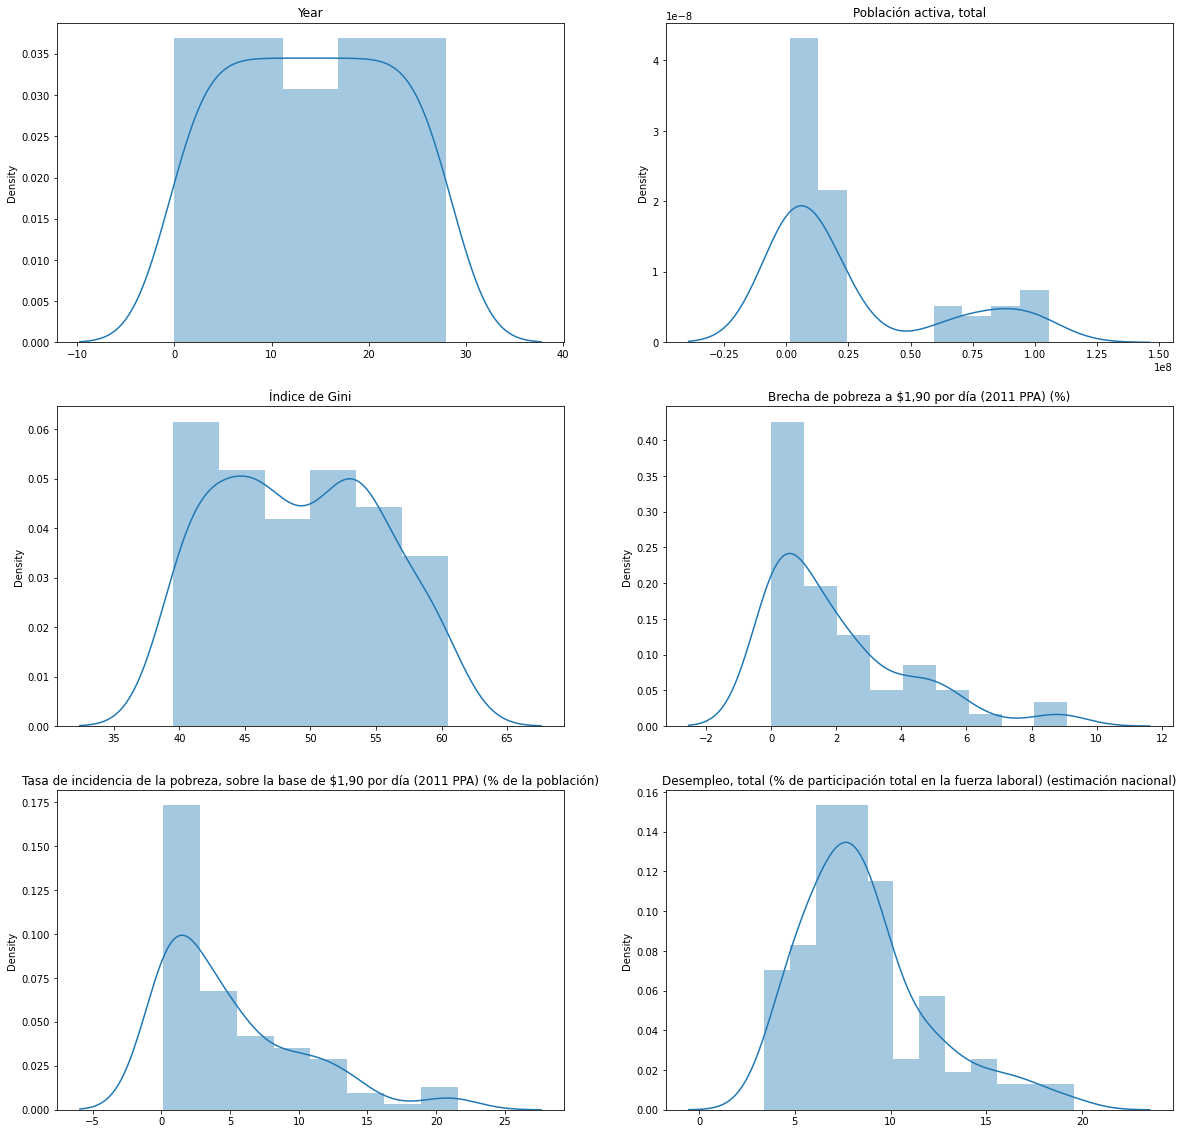

In [41]:
# Funciones de Densidad

columnsDataset = NonNormalizedFinalDataset.columns
_excepciones = ['Country_ARG', 'Country_BRA', 'Country_PAR', 'Country_URU']
_lista = [x for x in columnsDataset if x not in _excepciones ]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
row = 0
col = 0
for x in _lista:
        sns.distplot(NonNormalizedFinalDataset[[x]], ax=axs[row, col])
        axs[row, col].set_title(x)
        col = col + 1 if col < 1 else 0
        row = row + 1 if col == 0 else row

plt.show()

######   ***Aplicación StandardScaler***










A continuación se estandarizan los datos aplicando StandardScaler. La aplicación de esta estandarización no pareciera correcta para la variable "Year", que pierde la codificación ordinal que se le había generado, y las variables dummies, que pierden su significado al asumir valores distintos a 0 y 1.
Podría pensarse en aplicar la estandarización al resto de las variables pero ya no se hablaría de un dataset normalizado con media cero y desviación estandar uno.

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# Definimos dataset base
DatasetToNormalize_StandardScaler = NonNormalizedFinalDataset.copy()
# Definimos columnas a normalizar
ColumnsToNormalize_StandardScaler = DatasetToNormalize_StandardScaler.columns
# Aplicamos normalización
DatasetToNormalize_StandardScaler[ColumnsToNormalize_StandardScaler] = pd.DataFrame(StandardScaler().fit_transform(DatasetToNormalize_StandardScaler[ColumnsToNormalize_StandardScaler].values), columns=ColumnsToNormalize_StandardScaler, index=DatasetToNormalize_StandardScaler.index)

NormalizedDataset_SS = DatasetToNormalize_StandardScaler
NormalizedDataset_SS


,Year,"Población activa, total",Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country_ARG,Country_BRA,Country_PAR,Country_URU
0,-1.673320,-0.710159,-1.366157,-0.786771,-0.740026,-0.844466,-0.577350,-0.57735,1.732051,-0.57735
1,-1.553797,-0.708713,-0.794576,-0.326648,-0.307626,-1.051172,-0.577350,-0.57735,1.732051,-0.57735
2,-1.434274,-0.707325,-0.222994,0.133475,0.124774,-1.086608,-0.577350,-0.57735,1.732051,-0.57735
3,-1.314751,-0.705742,0.348587,0.593598,0.557174,-1.062984,-0.577350,-0.57735,1.732051,-0.57735
4,-1.195229,-0.704074,0.920169,1.053721,0.989574,-1.254926,-0.577350,-0.57735,1.732051,-0.57735
...,...,...,...,...,...,...,...,...,...,...
25,1.195229,-0.213983,-1.218335,-0.786771,-0.836543,-0.410383,1.732051,-0.57735,-0.577350,-0.57735
26,1.314751,-0.203909,-1.193697,-0.786771,-0.836543,-0.304077,1.732051,-0.57735,-0.577350,-0.57735
27,1.434274,-0.194277,-1.169060,-0.786771,-0.836543,-0.197771,1.732051,-0.57735,-0.577350,-0.57735
28,1.553797,-0.184561,-1.300458,-0.832783,-0.875150,-0.091465,1.732051,-0.57735,-0.577350,-0.57735


In [44]:
# Vemos que la media para todas las variables es 0, mientras que la desviación estandar es 1
round(NormalizedDataset_SS.describe())

,Year,"Población activa, total",Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country_ARG,Country_BRA,Country_PAR,Country_URU
count,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-2.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-1.0,-1.0,-1.0,-1.0
75%,1.0,0.0,1.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0
max,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0


######  ***Aplicación MinMaxScaler***

A continuación se aplica una normalización del tipo MinMax. La normalización deja a las variables dummies inalteradas, lo que es deseable para nuestro tratamiento.

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Definimos dataset base
DatasetToNormalize_MinMaxScaler = NonNormalizedFinalDataset.copy()
# Definimos columnas a normalizar
ColumnsToNormalize_MinMaxScaler = DatasetToNormalize_MinMaxScaler.columns
# Aplicamos normalización
DatasetToNormalize_MinMaxScaler[ColumnsToNormalize_MinMaxScaler] = pd.DataFrame(MinMaxScaler().fit_transform(DatasetToNormalize_MinMaxScaler[ColumnsToNormalize_MinMaxScaler].values), columns=ColumnsToNormalize_MinMaxScaler, index=DatasetToNormalize_MinMaxScaler.index)

NormalizedDataset_MMS = DatasetToNormalize_MinMaxScaler
NormalizedDataset_MMS

,Year,"Población activa, total",Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country_ARG,Country_BRA,Country_PAR,Country_URU
0,0.000000,0.003077,0.061905,0.032967,0.051163,0.148240,0.0,0.0,1.0,0.0
1,0.035714,0.003561,0.227619,0.142857,0.155349,0.105003,0.0,0.0,1.0,0.0
2,0.071429,0.004026,0.393333,0.252747,0.259535,0.097591,0.0,0.0,1.0,0.0
3,0.107143,0.004555,0.559048,0.362637,0.363721,0.102532,0.0,0.0,1.0,0.0
4,0.142857,0.005114,0.724762,0.472527,0.467907,0.062384,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25,0.857143,0.169199,0.104762,0.032967,0.027907,0.239036,1.0,0.0,0.0,0.0
26,0.892857,0.172572,0.111905,0.032967,0.027907,0.261272,1.0,0.0,0.0,0.0
27,0.928571,0.175797,0.119048,0.032967,0.027907,0.283508,1.0,0.0,0.0,0.0
28,0.964286,0.179050,0.080952,0.021978,0.018605,0.305744,1.0,0.0,0.0,0.0


In [47]:
# Vemos como los valores mínimos y máximos son 0 y 1 respectivamente.
NormalizedDataset_MMS.describe()

,Year,"Población activa, total",Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country_ARG,Country_BRA,Country_PAR,Country_URU
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.500000,0.240842,0.457984,0.220870,0.229471,0.324876,0.250000,0.250000,0.250000,0.250000
std,0.300104,0.336258,0.291180,0.239864,0.241994,0.210077,0.434891,0.434891,0.434891,0.434891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.003500,0.225476,0.030220,0.027907,0.186535,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.068855,0.445238,0.142857,0.152093,0.284744,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.278502,0.682143,0.318681,0.363023,0.407505,0.250000,0.250000,0.250000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


######   ***Comparaciones***


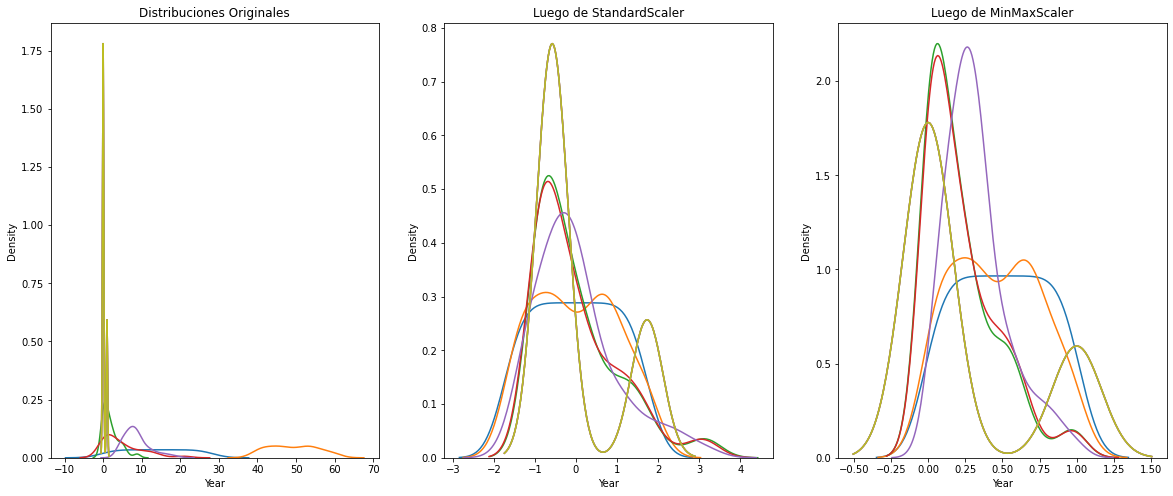

In [48]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 8))


ax0.set_title('Distribuciones Originales')

sns.kdeplot((NonNormalizedFinalDataset['Year']), ax=ax0)
sns.kdeplot((NonNormalizedFinalDataset['Índice de Gini']), ax=ax0)
sns.kdeplot(NonNormalizedFinalDataset['Brecha de pobreza a $1,90 por día (2011 PPA) (%)'], ax=ax0)
sns.kdeplot(NonNormalizedFinalDataset['Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)'], ax=ax0)
sns.kdeplot(NonNormalizedFinalDataset['Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)'], ax=ax0)
sns.kdeplot(NonNormalizedFinalDataset['Country_ARG'], ax=ax0)
sns.kdeplot(NonNormalizedFinalDataset['Country_BRA'], ax=ax0)
sns.kdeplot(NonNormalizedFinalDataset['Country_PAR'], ax=ax0)
sns.kdeplot(NonNormalizedFinalDataset['Country_URU'], ax=ax0)
ax1.set_title('Luego de StandardScaler')

sns.kdeplot((NormalizedDataset_SS['Year']), ax=ax1)
sns.kdeplot((NormalizedDataset_SS['Índice de Gini']), ax=ax1)
sns.kdeplot(NormalizedDataset_SS['Brecha de pobreza a $1,90 por día (2011 PPA) (%)'], ax=ax1)
sns.kdeplot(NormalizedDataset_SS['Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)'], ax=ax1)
sns.kdeplot(NormalizedDataset_SS['Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)'], ax=ax1)
sns.kdeplot(NormalizedDataset_SS['Country_ARG'], ax=ax1)
sns.kdeplot(NormalizedDataset_SS['Country_BRA'], ax=ax1)
sns.kdeplot(NormalizedDataset_SS['Country_PAR'], ax=ax1)
sns.kdeplot(NormalizedDataset_SS['Country_URU'], ax=ax1)
ax2.set_title('Luego de MinMaxScaler')

sns.kdeplot((NormalizedDataset_MMS['Year']), ax=ax2)
sns.kdeplot((NormalizedDataset_MMS['Índice de Gini']), ax=ax2)
sns.kdeplot(NormalizedDataset_MMS['Brecha de pobreza a $1,90 por día (2011 PPA) (%)'], ax=ax2)
sns.kdeplot(NormalizedDataset_MMS['Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)'], ax=ax2)
sns.kdeplot(NormalizedDataset_MMS['Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)'], ax=ax2)
sns.kdeplot(NormalizedDataset_MMS['Country_ARG'], ax=ax2)
sns.kdeplot(NormalizedDataset_MMS['Country_BRA'], ax=ax2)
sns.kdeplot(NormalizedDataset_MMS['Country_PAR'], ax=ax2)
sns.kdeplot(NormalizedDataset_MMS['Country_URU'], ax=ax2)
# Nota: No se incluye "Población activa, total" al distorsionar escala.

## Parte III: Modelado

### Parte III.I


Una parte esencial del proceso de modelado (y en realidad de todo experimento científico) es llevar a cabo un *seguimiento* de todas las pruebas realizadas de manera tal de no "perder resultados" (con la consecuencia de tener que repetir experimentos ya realizados) y poder llevar un registro de que tanto se mejoró/empeoró. 

Para llevar a cabo esto disponemos de una herramienta llamada [mlflow](https://mlflow.org/) que nos permite llevar el trackeo de todo el proceso de una manera simple y rápida, además de poder guardar información que consideremos relevante. Así, la primer consigna de esta sección es **entender y setear la herramienta, instalando mlflow si es necesario, de manera tal que todo experimento que se pruebe a partir de este momento quede registrado y pueda recuperarse**. En este [link](https://github.com/PiConsulting/Pensadero/tree/master/Eventos/2020/2020-03-06_wids_mlflow) encontrarán una implementación simple con mflow de la cual pueden guiarse.

In [49]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

     |████████████████████████████████| 13.9MB 312kB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 153kB 48.5MB/s 
     |████████████████████████████████| 327kB 40.6MB/s 
     |████████████████████████████████| 6.0MB 36.1MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 1.1MB 37.2MB/s 
     |████████████████████████████████| 163kB 45.1MB/s 
     |████████████████████████████████| 204kB 46.7MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
     |████████████████████████████████| 122kB 48.1MB/s 
     |████████████████████████████████| 2.6MB 31.9MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 


In [50]:
import mlflow

### Parte III.II

### Separación del conjunto de datos y análisis de conjuntos resultantes

Consigna 1: Realizar la partición del dataset en conjunto de entrenamiento y test. ¿Son las distribuciones de los datos similares en ambos conjuntos? Si la respuesta es no, ¿qué decisión tomarían?.

In [51]:
from sklearn.model_selection import train_test_split

Definimos variables target y variables independientes

In [52]:
Target_variable ='Índice de Gini'

In [53]:
X_variables = NonNormalizedFinalDataset.columns.tolist()
X_variables.remove(Target_variable)


In [54]:
X = NonNormalizedFinalDataset[X_variables]
                               
y = NonNormalizedFinalDataset[Target_variable]

In [56]:
# X: Split data into train and test
X_train = X[:-30]
X_test = X[-30:]

In [58]:
# Target: Split into training/testing sets
y_train = y[:-30]
y_test = y[-30:]

In [59]:
print("Dimensión X_train:" + str(X_train.shape))
print("Dimensión X_test:" + str(X_test.shape))
print("Dimensión y_train:" + str(y_train.shape))
print("Dimensión y_test:" + str(y_test.shape))

Dimensión X_train:(86, 9)
Dimensión X_test:(30, 9)
Dimensión y_train:(86,)
Dimensión y_test:(30,)


In [60]:
X_train.dtypes

Year                                                                                               float64
Población activa, total                                                                            float64
Brecha de pobreza a $1,90 por día (2011 PPA) (%)                                                   float64
Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)    float64
Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)             float64
Country_ARG                                                                                        float64
Country_BRA                                                                                        float64
Country_PAR                                                                                        float64
Country_URU                                                                                        float64
dtype: object

A continuación se analiza la distribución de los datos por conjunto. No se observan grandes diferencias en las funciones de densidad.

Text(0.5, 1.0, 'Distribución de la variable dependiente')

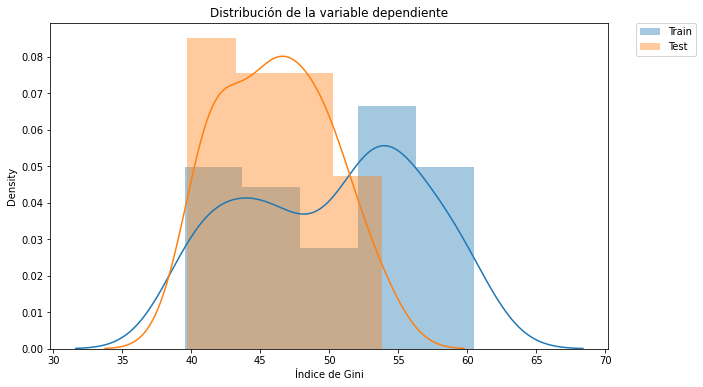

In [70]:
# Variable dependiente

plt.figure(figsize=(10,6))
sns.distplot(y_train, label="Train")
sns.distplot(y_test, label="Test")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Distribución de la variable dependiente")

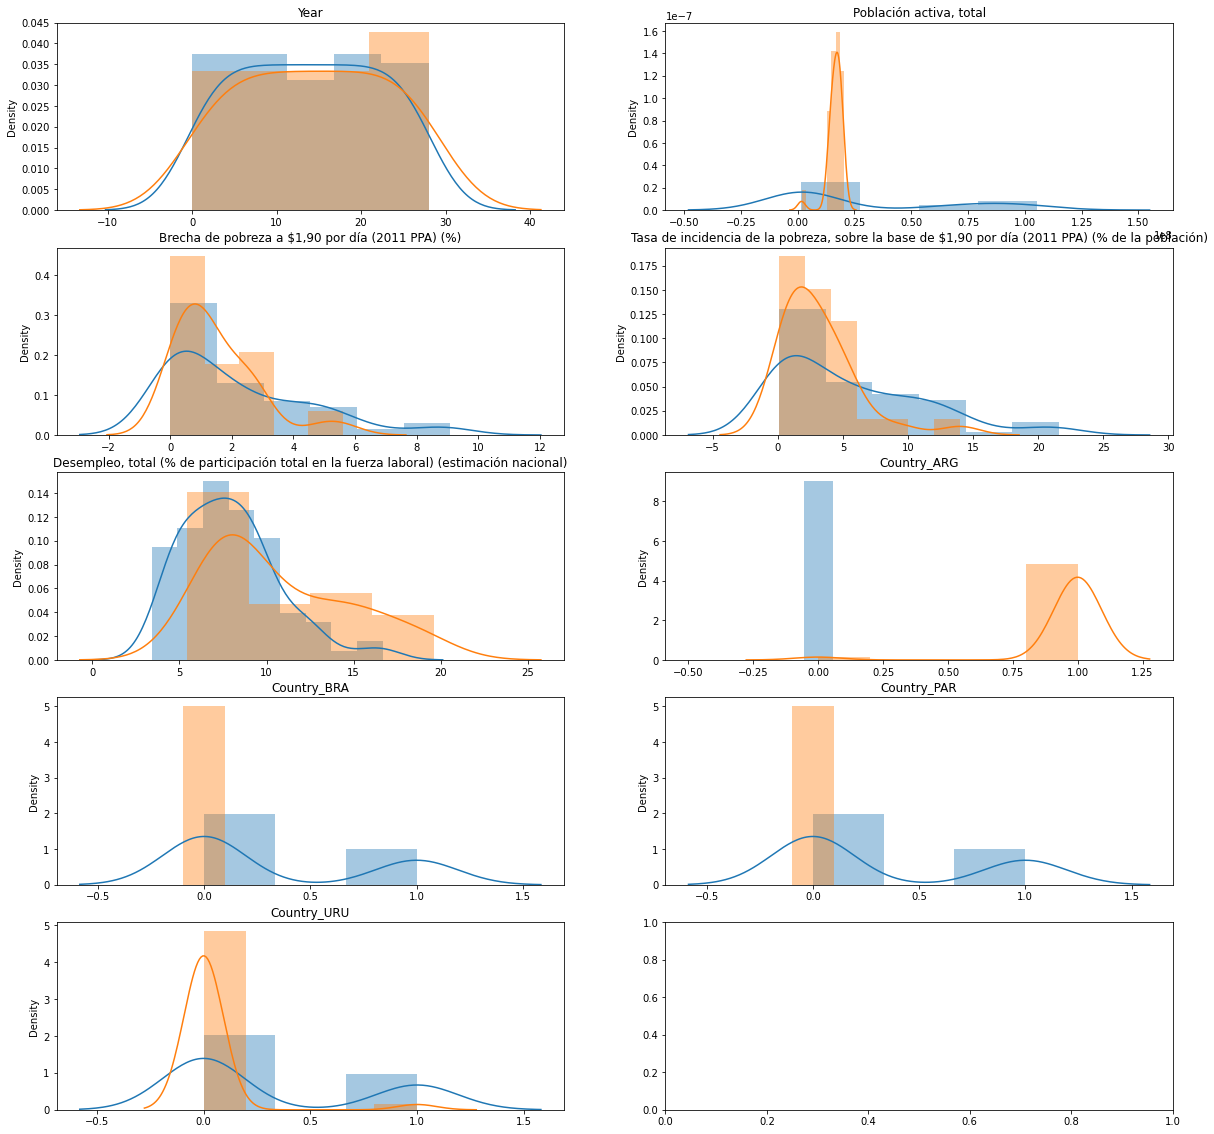

In [62]:
# Variables explicativas

columns = X_train.columns

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
row = 0
col = 0
for columns in columns:
        sns.distplot(X_train[[columns]], ax=axs[row, col], label="train")
        sns.distplot(X_test[[columns]], ax=axs[row, col], label="test")
        axs[row, col].set_title(columns)
        col = col + 1 if col < 1 else 0
        row = row + 1 if col == 0 else row

plt.show()

Como puede observarse en el gráfico anterior, las distribuciones de los valores de X train y test, son similares. Indicando que es una división correcta.

### Regresión Lineal y Polinomial

Consigna 2: Probar modelos de *regresión lineal* y *polinomial* (elegir al menos dos grados diferentes) sobre los **datos sin normalizar**. ¿Cómo son los errores sobre el conjunto de entrenamiento y sobre el conjunto de test? Analizar los resultados.

#### Regresión Lineal

In [71]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [72]:
mlflow.set_experiment("Linear Regression On Non Normalized Dataset")

with mlflow.start_run():

  # Entrenamiento:
  linear_regression_NonNormalized = linear_model.LinearRegression()
  linear_regression_NonNormalized.fit(X_train, y_train)

  # Predicción:
  y_train_pred_LinearRegressionNonNormalized = linear_regression_NonNormalized.predict(X_train)
  y_test_pred_LinearRegressionNonNormalized = linear_regression_NonNormalized.predict(X_test)
  
  # Evaluación:
  train_error_LinearRegressionNonNormalized = mean_squared_error(y_train, y_train_pred_LinearRegressionNonNormalized)
  test_error_LinearRegressionNonNormalized = mean_squared_error(y_test, y_test_pred_LinearRegressionNonNormalized)
  train_R2_LinearRegressionNonNormalized = r2_score(y_train, y_train_pred_LinearRegressionNonNormalized)
  test_R2_LinearRegressionNonNormalized = r2_score(y_test, y_test_pred_LinearRegressionNonNormalized)

  mlflow.log_metric("Train Error", train_error_LinearRegressionNonNormalized)
  mlflow.log_metric("Test Error", test_error_LinearRegressionNonNormalized)
  mlflow.log_metric("Train R2", train_R2_LinearRegressionNonNormalized)
  mlflow.log_metric("Test R2", test_R2_LinearRegressionNonNormalized)
  mlflow.sklearn.log_model(linear_regression_NonNormalized, "Linear Regression On Non Normalized Dataset")

In [73]:
# Verificamos que la variable dependiente se encuentre entre cero y 100
_check_train = (0 > y_train_pred_LinearRegressionNonNormalized) | (y_train_pred_LinearRegressionNonNormalized>100)
_check_train = _check_train.sum()
print(f"Existen {_check_train} valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X train.")

_check_test= (0 > y_test_pred_LinearRegressionNonNormalized) | (y_test_pred_LinearRegressionNonNormalized>100)
_check_test = _check_test.sum()
print(f"Existen {_check_test} valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X test.")

Existen 0 valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X train.
Existen 0 valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X test.


In [66]:
print("El error cuadrático medio en train es:" + str(train_error_LinearRegressionNonNormalized))
print("El error cuadrático medio en test es:" + str(test_error_LinearRegressionNonNormalized))
print("El R2 en train es:" + str(train_R2_LinearRegressionNonNormalized))
print("El R2 en test es:" + str(test_R2_LinearRegressionNonNormalized))

El error cuadrático medio en train es:3.7057966061859333
El error cuadrático medio en test es:8.017202961043633
El R2 en train es:0.908764234565184
El R2 en test es:0.4616867129302169


In [74]:
#Modelo completo
Reg_model = np.concatenate((y_train_pred_LinearRegressionNonNormalized, y_test_pred_LinearRegressionNonNormalized), axis=0)

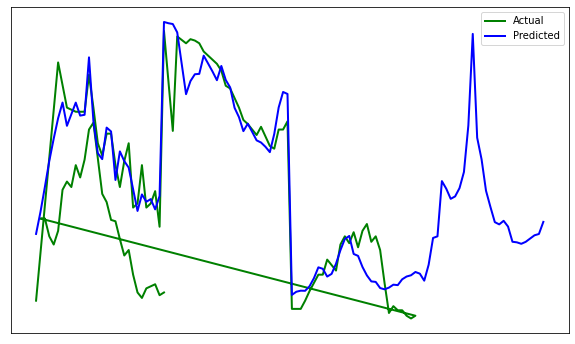

In [75]:
# Plot outputs

plt.figure(figsize=(10, 6))
plt.plot(y, color='green', linewidth=2, label = "Actual")  
plt.plot(Reg_model, color='blue', linewidth=2, label = "Predicted")
plt.xticks(())
plt.yticks(())
plt.legend(loc = "Left corner")

plt.show()

In [76]:
# The coefficients
print('Coefficients: \n', linear_regression_NonNormalized.coef_)

Coefficients: 
 [ 7.13935989e-02  9.43846246e-08 -1.52983929e+00  1.48417446e+00
  3.76785473e-01  1.38777878e-16 -2.90746257e+00  3.73689797e+00
 -8.29435405e-01]


Grafico solo de train:

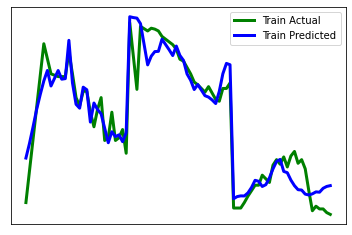

In [78]:
# Plot outputs
plt.plot(y_train, color='green', linewidth=3, label = "Train Actual")  
plt.plot(y_train_pred_LinearRegressionNonNormalized, color='blue', linewidth=3, label = "Train Predicted")
plt.xticks(())
plt.yticks(())

plt.legend(loc = "Left corner")

plt.show()

Graficos solo de test:

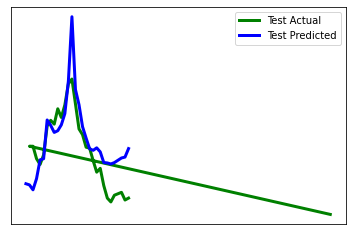

In [80]:
# Plot outputs
plt.plot(y_test, color='green', linewidth=3, label = "Test Actual")  
plt.plot(y_test_pred_LinearRegressionNonNormalized, color='blue', linewidth=3, label = "Test Predicted")
plt.xticks(())
plt.yticks(())

plt.legend(loc = "Left corner")

plt.show()

#### Regresión Polinomial

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [82]:
train_errors_PolynomialRegressionNonNormalized = []
test_errors_PolynomialRegressionNonNormalized = []
train_R2s_PolynomialRegressionNonNormalized = []
test_R2s_PolynomialRegressionNonNormalized = []

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:

  # Entrenamiento:
  polynomial_regression_NonNormalized = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression(fit_intercept = True))
  polynomial_regression_NonNormalized.fit(X_train, y_train)

  # Predicción:
  y_train_pred_PolynomialRegressionNonNormalized = polynomial_regression_NonNormalized.predict(X_train)
  y_test_pred_PolynomialRegressionNonNormalized = polynomial_regression_NonNormalized.predict(X_test)

  # Evaluación:
  train_error_PolynomialRegressionNonNormalized = mean_squared_error(y_train, y_train_pred_PolynomialRegressionNonNormalized)
  test_error_PolynomialRegressionNonNormalized = mean_squared_error(y_test, y_test_pred_PolynomialRegressionNonNormalized)
  train_errors_PolynomialRegressionNonNormalized.append(train_error_PolynomialRegressionNonNormalized)
  test_errors_PolynomialRegressionNonNormalized.append(test_error_PolynomialRegressionNonNormalized)
  train_R2_PolynomialRegressionNonNormalized = r2_score(y_train, y_train_pred_PolynomialRegressionNonNormalized)
  test_R2_PolynomialRegressionNonNormalized = r2_score(y_test, y_test_pred_PolynomialRegressionNonNormalized)
  train_R2s_PolynomialRegressionNonNormalized.append(train_R2_PolynomialRegressionNonNormalized)
  test_R2s_PolynomialRegressionNonNormalized.append(test_R2_PolynomialRegressionNonNormalized)

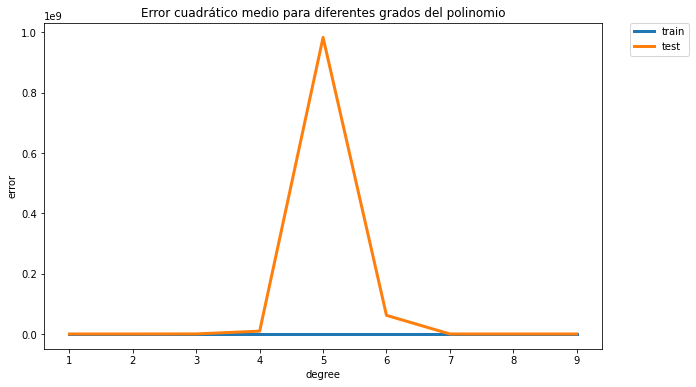

In [83]:
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors_PolynomialRegressionNonNormalized, linewidth=3,  label="train")
plt.plot(degrees, test_errors_PolynomialRegressionNonNormalized,  linewidth=3, label="test")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("error")
plt.xlabel("degree")
plt.title("Error cuadrático medio para diferentes grados del polinomio")
plt.show()

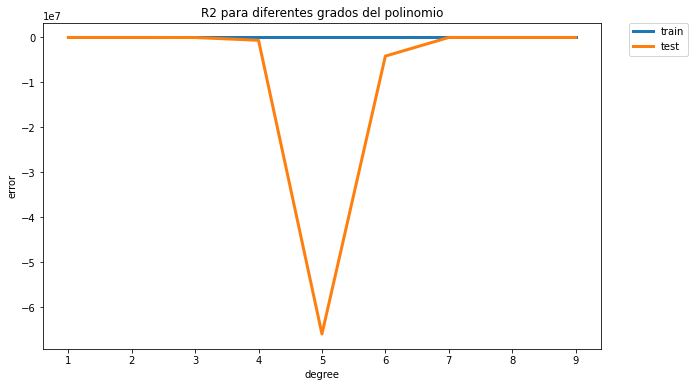

In [84]:
plt.figure(figsize=(10,6))
plt.plot(degrees, train_R2s_PolynomialRegressionNonNormalized,linewidth=3, label="train")
plt.plot(degrees, test_R2s_PolynomialRegressionNonNormalized,linewidth=3, label="test")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("error")
plt.xlabel("degree")
plt.title("R2 para diferentes grados del polinomio")
plt.show()

In [85]:
PolynomialRegressionComparisonsDataframe = pd.DataFrame(data = [train_errors_PolynomialRegressionNonNormalized,
                                                      test_errors_PolynomialRegressionNonNormalized,
                                                      train_R2s_PolynomialRegressionNonNormalized,
                                                      test_R2s_PolynomialRegressionNonNormalized], 
                                              columns = degrees ,
                                              index = ["Train MSE", "Test MSE", "Train R2", "Test R2"])

PolynomialRegressionComparisonsDataframe

,1,2,3,4,5,6,7,8,9
Train MSE,3.705797,1.487221,6.519110,8.114124e+00,8.664898e+00,1.854067e+01,19.930637,20.042842,20.358932
Test MSE,8.017203,1519.518179,210946.043618,9.336236e+06,9.832062e+08,6.178884e+07,18.664068,14.497055,16.298171
Train R2,0.908764,0.963385,0.839501,8.002323e-01,7.866724e-01,5.435335e-01,0.509313,0.506550,0.498768
Test R2,0.461687,-101.027706,-14162.924586,-6.268785e+05,-6.601716e+07,-4.148797e+06,-0.253195,0.026598,-0.094337


De los gráficos y tablas anteriores se desprende que el menor error cuadrático medio para test y el mayor R2 para test se da para grado 2 del polinomio.


A continuación nos quedamos con el modelo de grado de polinomio 2 y graficamos:

In [100]:
# Entrenamiento:
polynomial_regression_NonNormalizedFinal = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression(fit_intercept = True))
polynomial_regression_NonNormalizedFinal.fit(X_train, y_train)

# Predicción:
y_train_pred_PolynomialRegressionNonNormalizedFinal = polynomial_regression_NonNormalizedFinal.predict(X_train)
y_test_pred_PolynomialRegressionNonNormalizedFinal = polynomial_regression_NonNormalizedFinal.predict(X_test)

In [101]:
# Verificamos que la variable dependiente se encuentre entre cero y 100
_check_train = (0 > y_train_pred_PolynomialRegressionNonNormalizedFinal) | (y_train_pred_PolynomialRegressionNonNormalizedFinal>100)
_check_train = _check_train.sum()
print(f"Existen {_check_train} valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X train.")

_check_test= (0 > y_test_pred_PolynomialRegressionNonNormalizedFinal) | (y_test_pred_PolynomialRegressionNonNormalizedFinal>100)
_check_test = _check_test.sum()
print(f"Existen {_check_test} valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X test.")

Existen 0 valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X train.
Existen 0 valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X test.


In [102]:
#Modelo completo
Pol_model = np.concatenate((y_train_pred_PolynomialRegressionNonNormalizedFinal, y_test_pred_PolynomialRegressionNonNormalizedFinal), axis=0)

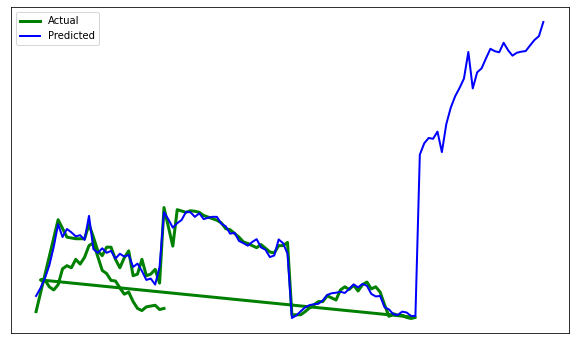

In [111]:
# Plot outputs

plt.figure(figsize=(10, 6))
plt.plot(y, color='green', linewidth=3, label = "Actual")  
plt.plot(Pol_model, color='blue', linewidth=2, label = "Predicted")
plt.xticks(())
plt.yticks(())
plt.legend(loc = "Left corner")

Solo con los datos de train:

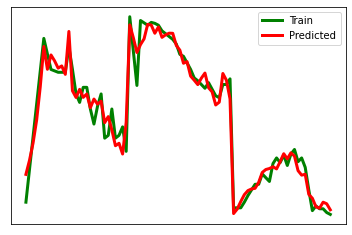

In [112]:
# Plot outputs
plt.plot(y_train, color='green', linewidth=3, label = "Train")  
plt.plot(y_train_pred_PolynomialRegressionNonNormalizedFinal, color='red', linewidth=3, label = "Predicted")
plt.xticks(())
plt.yticks(())

plt.legend(loc = "Left corner")

plt.show()

Solo con los datos de test:

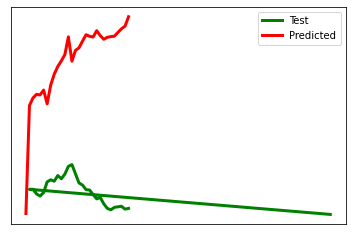

In [113]:
# Plot outputs
plt.plot(y_test, color='green', linewidth=3, label = "Test")  
plt.plot(y_test_pred_PolynomialRegressionNonNormalizedFinal, color='red', linewidth=3, label = "Predicted")
plt.xticks(())
plt.yticks(())

plt.legend(loc = "Left corner")

plt.show()

### Arbol de decisión/Random Forest

Consigna 3: Probar algún modelo del tipo *árbol de decisión/random forest* para problemas de regresión también sobre los **datos sin normalizar**. Extraer y estudiar el feature importance. Análizar la performance de estos modelos y comparar con los resultados del punto 2 (**Sabemos que esto va a dar muy mal por la poca cantidad de datos!**).

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
mlflow.set_experiment("Decision Tree Regressor On Non Normalized Dataset")

with mlflow.start_run():

  # Entrenamiento:
  clf_NonNormalized = DecisionTreeRegressor()
  clf_NonNormalized.fit(X_train, y_train)

  # Predicción:
  y_train_pred_ClfNonNormalized = clf_NonNormalized.predict(X_train)  
  y_test_pred_ClfNonNormalized = clf_NonNormalized.predict(X_test)
  
  # Evaluación:
  train_error_ClfNonNormalized = mean_squared_error(y_train, y_train_pred_ClfNonNormalized)
  test_error_ClfNonNormalized = mean_squared_error(y_test, y_test_pred_ClfNonNormalized)

  mlflow.log_metric("Train Error", train_error_ClfNonNormalized)
  mlflow.log_metric("Test Error", test_error_ClfNonNormalized)
  mlflow.sklearn.log_model(clf_NonNormalized, "Decision Tree Regressor On Non Normalized Dataset")

In [116]:
# Verificamos que la variable dependiente se encuentre entre cero y 100
_check_train = (0 > y_train_pred_ClfNonNormalized) | (y_train_pred_ClfNonNormalized>100)
_check_train = _check_train.sum()
print(f"Existen {_check_train} valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X train.")

_check_test= (0 > y_test_pred_ClfNonNormalized) | (y_test_pred_ClfNonNormalized>100)
_check_test = _check_test.sum()
print(f"Existen {_check_test} valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X test.")

Existen 0 valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X train.
Existen 0 valores predichos por el modelo que están fuera del rango [0,100] cuando se utiliza X test.


In [117]:
print("El error cuadrático medio en train es:" + str(train_error_ClfNonNormalized))
print("El error cuadrático medio en test es:" + str(test_error_ClfNonNormalized))

El error cuadrático medio en train es:0.0
El error cuadrático medio en test es:25.904749999999996


### Modelaje sobre dataset normalizado

Consigna 4: Repetir los pasos 2 y 3 sobre el **dataset normalizado**: ¿Cambian los resultados? ¿Se observa alguna diferencia en performance? ¿Algo para destacar?.

#### Regresión Lineal y Polinomial sobre Dataset Normalizado

In [118]:
Target_nom_variable = 'Índice de Gini'

In [119]:
X_norm_variables = NormalizedDataset_MMS.columns.tolist()
X_norm_variables.remove(Target_nom_variable)

In [120]:
X_norm = NormalizedDataset_MMS[X_norm_variables]

y_norm = NormalizedDataset_MMS[Target_nom_variable]

In [123]:
# X: Split data into train and test
X_norm_train = X_norm[:-30]
X_norm_test = X_norm[-30:]

In [122]:
# Target: Split into training/testing sets
y_norm_train = y_norm[:-30]
y_norm_test = y_norm[-30:]


##### Regresión Lineal

In [124]:
mlflow.set_experiment("Linear Regression On Normalized Dataset")

with mlflow.start_run():

  # Entrenamiento:
  linear_regression_Normalized = linear_model.LinearRegression()
  linear_regression_Normalized.fit(X_norm_train, y_norm_train)

  # Predicción:
  y_train_pred_LinearRegressionNormalized = linear_regression_Normalized.predict(X_norm_train)
  y_test_pred_LinearRegressionNormalized = linear_regression_Normalized.predict(X_norm_test)
  
  # Evaluación:
  train_error_LinearRegressionNormalized = mean_squared_error(y_norm_train, y_train_pred_LinearRegressionNormalized)
  test_error_LinearRegressionNormalized = mean_squared_error(y_norm_test, y_test_pred_LinearRegressionNormalized)
  train_R2_LinearRegressionNormalized = r2_score(y_norm_train, y_train_pred_LinearRegressionNormalized)
  test_R2_LinearRegressionNormalized = r2_score(y_norm_test, y_test_pred_LinearRegressionNormalized)

  mlflow.log_metric("Train Error", train_error_LinearRegressionNormalized)
  mlflow.log_metric("Test Error", test_error_LinearRegressionNormalized)
  mlflow.log_metric("Train R2", train_R2_LinearRegressionNormalized)
  mlflow.log_metric("Test R2", test_R2_LinearRegressionNormalized)
  mlflow.sklearn.log_model(linear_regression_Normalized, "Linear Regression On Normalized Dataset")

INFO: 'Linear Regression On Normalized Dataset' does not exist. Creating a new experiment


In [125]:
print("El error cuadrático medio en train es:" + str(train_error_LinearRegressionNormalized))
print("El error cuadrático medio en test es:" + str(test_error_LinearRegressionNormalized))
print("El R2 en train es:" + str(train_R2_LinearRegressionNormalized))
print("El R2 en test es:" + str(test_R2_LinearRegressionNormalized))

El error cuadrático medio en train es:0.008403166907451088
El error cuadrático medio en test es:0.018179598551119856
El R2 en train es:0.9087642345651841
El R2 en test es:0.4616867129302017


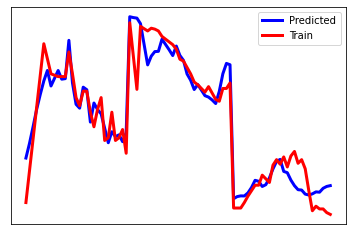

In [135]:
# Plot outputs   
plt.plot( y_train_pred_LinearRegressionNormalized, color='blue', linewidth=3, label = "Predicted") 
plt.plot(y_norm_train, color='red', linewidth=3, label = "Train") 
plt.xticks(())
plt.yticks(())
plt.legend(loc = "Left corner")
plt.show()

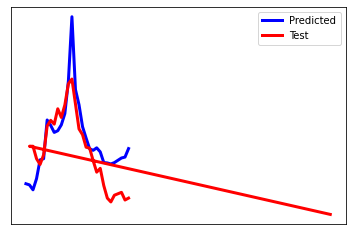

In [136]:
# Plot outputs   
plt.plot( y_test_pred_LinearRegressionNormalized, color='blue', linewidth=3, label = "Predicted") 
plt.plot(y_norm_test, color='red', linewidth=3, label = "Test") 
plt.xticks(())
plt.yticks(())
plt.legend(loc = "Left corner")
plt.show()

In [137]:
#Modelo completo
reg_norm_model = np.concatenate((y_train_pred_LinearRegressionNormalized, y_test_pred_LinearRegressionNormalized), axis=0)

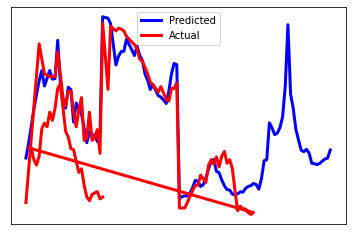

In [139]:
# Plot outputs   
plt.plot( reg_norm_model, color='blue', linewidth=3, label = "Predicted") 
plt.plot(y_norm, color='red', linewidth=3, label = "Actual") 
plt.xticks(())
plt.yticks(())
plt.legend(loc = "Left corner")
plt.show()

##### Regresión Polinomial

In [145]:
train_errors_PolynomialRegressionNormalized = []
test_errors_PolynomialRegressionNormalized = []
train_R2s_PolynomialRegressionNormalized = []
test_R2s_PolynomialRegressionNormalized = []

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:

  # Entrenamiento:
  polynomial_regression_Normalized = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
  polynomial_regression_Normalized.fit(X_norm_train, y_norm_train)

  # Predicción:
  y_train_pred_PolynomialRegressionNormalized = polynomial_regression_Normalized.predict(X_norm_train)
  y_test_pred_PolynomialRegressionNormalized = polynomial_regression_Normalized.predict(X_norm_test)

  # Evaluación:
  train_error_PolynomialRegressionNormalized = mean_squared_error(y_norm_train, y_train_pred_PolynomialRegressionNormalized)
  test_error_PolynomialRegressionNormalized = mean_squared_error(y_norm_test, y_test_pred_PolynomialRegressionNormalized)
  train_errors_PolynomialRegressionNormalized.append(train_error_PolynomialRegressionNormalized)
  test_errors_PolynomialRegressionNormalized.append(test_error_PolynomialRegressionNormalized)
  train_R2_PolynomialRegressionNormalized = r2_score(y_norm_train, y_train_pred_PolynomialRegressionNormalized)
  test_R2_PolynomialRegressionNormalized = r2_score(y_norm_test, y_test_pred_PolynomialRegressionNormalized)
  train_R2s_PolynomialRegressionNormalized.append(train_R2_PolynomialRegressionNormalized)
  test_R2s_PolynomialRegressionNormalized.append(test_R2_PolynomialRegressionNormalized)

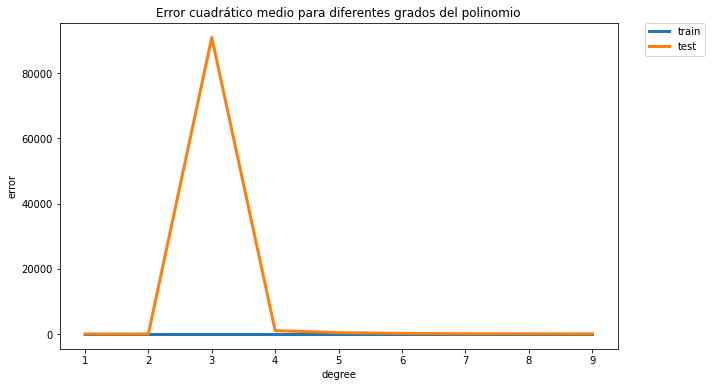

In [146]:
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors_PolynomialRegressionNormalized, linewidth = 3, label="train")
plt.plot(degrees, test_errors_PolynomialRegressionNormalized, linewidth = 3, label="test")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("error")
plt.xlabel("degree")
plt.title("Error cuadrático medio para diferentes grados del polinomio")
plt.show()

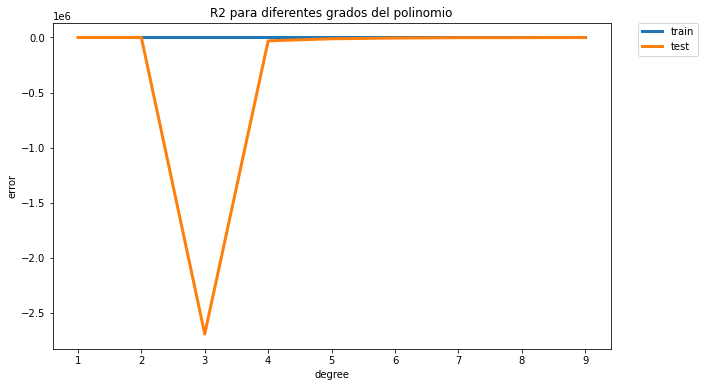

In [147]:
plt.figure(figsize=(10,6))
plt.plot(degrees, train_R2s_PolynomialRegressionNormalized,linewidth = 3, label="train")
plt.plot(degrees, test_R2s_PolynomialRegressionNormalized,linewidth = 3, label="test")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("error")
plt.xlabel("degree")
plt.title("R2 para diferentes grados del polinomio")
plt.show()

In [148]:
PolynomialRegressionComparisonsDataframeNorm = pd.DataFrame(data = [train_errors_PolynomialRegressionNormalized,
                                                                    test_errors_PolynomialRegressionNormalized,
                                                                    train_R2s_PolynomialRegressionNormalized,
                                                                    test_R2s_PolynomialRegressionNormalized], 
                                                            columns = degrees ,
                                                            index = ["Train MSE", "Test MSE", "Train R2", "Test R2"])

PolynomialRegressionComparisonsDataframeNorm

,1,2,3,4,5,6,7,8,9
Train MSE,0.008403,0.002052,9.216028e-24,8.598774e-27,6.882032e-27,6.673458e-27,4.352715e-27,7.000627e-27,6.120419e-27
Test MSE,0.018180,3.919603,9.094241e+04,1.028696e+03,4.021453e+02,1.753189e+02,7.194009e+01,5.274457e+01,2.354126e+01
Train R2,0.908764,0.977721,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Test R2,0.461687,-115.062769,-2.692881e+06,-3.045957e+04,-1.190686e+04,-5.190339e+03,-2.129207e+03,-1.560811e+03,-6.960767e+02


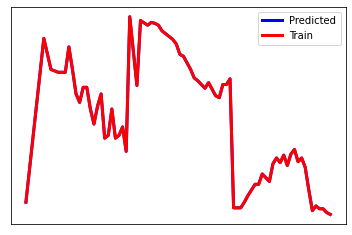

In [149]:
# Plot outputs   
plt.plot( y_train_pred_PolynomialRegressionNormalized, color='blue', linewidth=3, label = "Predicted") 
plt.plot(y_norm_train, color='red', linewidth=3, label = "Train") 
plt.xticks(())
plt.yticks(())
plt.legend(loc = "Left corner")
plt.show()

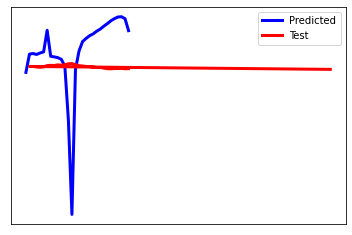

In [151]:
# Plot outputs   
plt.plot( y_test_pred_PolynomialRegressionNormalized, color='blue', linewidth=3, label = "Predicted") 
plt.plot(y_norm_test, color='red', linewidth=3, label = "Test") 
plt.xticks(())
plt.yticks(())
plt.legend(loc = "Left corner")
plt.show()

In [152]:
#Modelo completo
pol_norm_model = np.concatenate((y_train_pred_PolynomialRegressionNormalized, y_test_pred_PolynomialRegressionNormalized), axis=0)

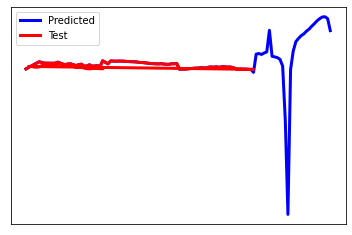

In [153]:
# Plot outputs   
plt.plot( pol_norm_model, color='blue', linewidth=3, label = "Predicted") 
plt.plot(y_norm, color='red', linewidth=3, label = "Test") 
plt.xticks(())
plt.yticks(())
plt.legend(loc = "Left corner")
plt.show()

#### Arbol de Decisión sobre Dataset Normalizado

In [130]:
mlflow.set_experiment("Decision Tree Regressor On Normalized Dataset")

with mlflow.start_run():

  # Entrenamiento:
  clf_Normalized = DecisionTreeRegressor()
  clf_Normalized.fit(X_norm_train, y_norm_train)

  # Predicción:
  y_train_pred_ClfNormalized = clf_Normalized.predict(X_norm_train)  
  y_test_pred_ClfNormalized = clf_Normalized.predict(X_norm_test)
  
  # Evaluación:
  train_error_ClfNormalized = mean_squared_error(y_norm_train, y_train_pred_ClfNormalized)
  test_error_ClfNormalized = mean_squared_error(y_norm_test, y_test_pred_ClfNormalized)

  mlflow.log_metric("Train Error", train_error_ClfNormalized)
  mlflow.log_metric("Test Error", test_error_ClfNormalized)
  mlflow.sklearn.log_model(clf_Normalized, "Decision Tree Regressor On Normalized Dataset")

INFO: 'Decision Tree Regressor On Normalized Dataset' does not exist. Creating a new experiment


In [131]:
print("El error cuadrático medio en train es:" + str(train_error_ClfNormalized))
print("El error cuadrático medio en test es:" + str(test_error_ClfNormalized))

El error cuadrático medio en train es:0.0
El error cuadrático medio en test es:0.12162830687830682


### Práctica de MLflow

Consigna 5: A modo de práctica recuperar algún resultado usando mlflow. Nota: Se recomienda guardar las métricas obtenidas, modelos, tipo de algoritmo probado (y por qué no los dataset usados). 

In [132]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Train Error,metrics.Test Error,tags.mlflow.user,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.source.name
0,583e0f8ef20a44d0a3ae360c195f041b,4,FINISHED,file:///content/mlruns/4/583e0f8ef20a44d0a3ae360c195f041b/artifacts,2020-10-21 22:20:20.633000+00:00,2020-10-21 22:20:20.670000+00:00,0.0,0.121628,root,"[{""run_id"": ""583e0f8ef20a44d0a3ae360c195f041b"", ""artifact_path"": ""Decision Tree Regressor On Normalized Dataset"", ""utc_time_created"": ""2020-10-21 22:20:20.657017"", ""flavors"": {""python_function"": {""model_path"": ""model.pkl"", ""loader_module"": ""mlflow.sklearn"", ""python_version"": ""3.6.9"", ""env"": ""conda.yaml""}, ""sklearn"": {""pickled_model"": ""model.pkl"", ""sklearn_version"": ""0.22.2.post1"", ""serialization_format"": ""cloudpickle""}}}]",LOCAL,/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py


## Conclusiones

Orientar conclusiones a:

Analisis de problemas al momento de modelar un dataset reducido (¿Qué rol cumple el overfitting en este caso?)